In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 15.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 81.2MB/s]



0: 320x640 9 persons, 1 bicycle, 3 cars, 1 truck, 1 traffic light, 69.2ms
Speed: 13.8ms preprocess, 69.2ms inference, 248.4ms postprocess per image at shape (1, 3, 320, 640)
Detected: person, Confidence: 0.81
Bounding Box Location: (1692, 245) to (1818, 665)
Detected: person, Confidence: 0.76
Bounding Box Location: (1809, 194) to (1933, 720)
Detected: person, Confidence: 0.73
Bounding Box Location: (1424, 313) to (1534, 611)
Detected: person, Confidence: 0.72
Bounding Box Location: (1572, 321) to (1646, 620)
Detected: bicycle, Confidence: 0.71
Bounding Box Location: (1180, 422) to (1320, 546)
Detected: car, Confidence: 0.67
Bounding Box Location: (0, 398) to (133, 618)
Detected: person, Confidence: 0.66
Bounding Box Location: (1209, 366) to (1266, 520)
Detected: truck, Confidence: 0.66
Bounding Box Location: (0, 165) to (295, 540)
Detected: person, Confidence: 0.53
Bounding Box Location: (1904, 271) to (2004, 712)
Detected: person, Confidence: 0.46
Bounding Box Location: (740, 377) to

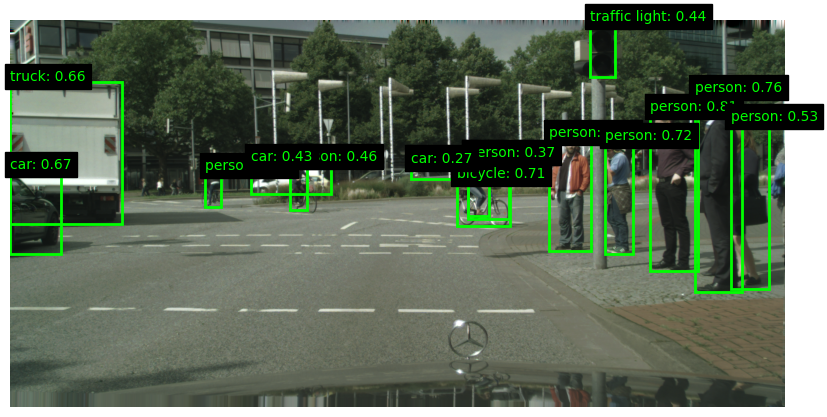


Detected Objects with Details:
person: 0.81, Location: (1692, 245) to (1818, 665)
person: 0.76, Location: (1809, 194) to (1933, 720)
person: 0.73, Location: (1424, 313) to (1534, 611)
person: 0.72, Location: (1572, 321) to (1646, 620)
bicycle: 0.71, Location: (1180, 422) to (1320, 546)
car: 0.67, Location: (0, 398) to (133, 618)
person: 0.66, Location: (1209, 366) to (1266, 520)
truck: 0.66, Location: (0, 165) to (295, 540)
person: 0.53, Location: (1904, 271) to (2004, 712)
person: 0.46, Location: (740, 377) to (784, 502)
traffic light: 0.44, Location: (1533, 6) to (1598, 152)
person: 0.44, Location: (515, 400) to (558, 495)
car: 0.43, Location: (636, 376) to (848, 460)
person: 0.37, Location: (1209, 366) to (1318, 526)
car: 0.27, Location: (1059, 381) to (1195, 421)


In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import torch
from PIL import Image
import numpy as np

# Load YOLOv8 model (choose a model based on size & speed: yolov8n.pt, yolov8s.pt, yolov8m.pt, etc.)
model = YOLO("yolov8n.pt")  

# Load an image
image_path = "/kaggle/input/cityscapes/Cityscapes/Cityspaces/images/train/hanover_000000_005970_leftImg8bit.png"  # Replace with your image path
image = Image.open(image_path)

# Run inference
results = model(image)

# Convert image to NumPy array for Matplotlib visualization
image_np = np.array(image)

# Create a Matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_np)
ax.axis("off")  # Hide axes

# Initialize an array or string to store object information
detected_objects = []

# Process all detected objects
for result in results:
    for box in result.boxes:
        class_id = int(box.cls[0])  # Get class ID
        name = model.names[class_id]  # Get class name
        confidence = float(box.conf[0])  # Get confidence score
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates

        # Draw bounding box around detected object
        ax.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor="lime", linewidth=2, fill=False))

        # Display object name, confidence score, and bounding box location
        label = f"{name}: {confidence:.2f}"
        ax.text(x1, y1 - 5, label, fontsize=10, color="lime", backgroundcolor="black")

        # Add the location of the bounding box to the label
        box_location = f"Location: ({x1}, {y1}) to ({x2}, {y2})"
        
        # Collect the object name, confidence score, and location in the array
        detected_objects.append(f"{name}: {confidence:.2f}, {box_location}")

        # Print detected objects and their bounding box coordinates to console
        print(f"Detected: {name}, Confidence: {confidence:.2f}")
        print(f"Bounding Box Location: ({x1}, {y1}) to ({x2}, {y2})")

# Show the image with detected objects and bounding box locations
plt.show()

# Print all detected object information
print("\nDetected Objects with Details:")
for obj in detected_objects:
    print(obj)


In [3]:
print(detected_objects)

['person: 0.81, Location: (1692, 245) to (1818, 665)', 'person: 0.76, Location: (1809, 194) to (1933, 720)', 'person: 0.73, Location: (1424, 313) to (1534, 611)', 'person: 0.72, Location: (1572, 321) to (1646, 620)', 'bicycle: 0.71, Location: (1180, 422) to (1320, 546)', 'car: 0.67, Location: (0, 398) to (133, 618)', 'person: 0.66, Location: (1209, 366) to (1266, 520)', 'truck: 0.66, Location: (0, 165) to (295, 540)', 'person: 0.53, Location: (1904, 271) to (2004, 712)', 'person: 0.46, Location: (740, 377) to (784, 502)', 'traffic light: 0.44, Location: (1533, 6) to (1598, 152)', 'person: 0.44, Location: (515, 400) to (558, 495)', 'car: 0.43, Location: (636, 376) to (848, 460)', 'person: 0.37, Location: (1209, 366) to (1318, 526)', 'car: 0.27, Location: (1059, 381) to (1195, 421)']


# **Integrate with LLM**

In [4]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import pipeline

# Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-4k-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

# Create a pipeline
generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    return_full_text=False,
    max_new_tokens=500,
    do_sample=False
)

config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

Device set to use cuda


In [5]:
# Join detected_objects array into a single string
content = "\n".join(detected_objects)

# The prompt (user input / query)
messages = [
    {"role": "user", "content": 
     '''
     "Generate a short caption based on the following information. Do not include any numerical values, bounding box locations, or confidence levels. Focus only on the object names:
      from the following 'content' variable"
      This should guide the model to create a short, relevant caption based solely on the object names.
     ''' + content}
]

# Generate output
output = generator(messages)
print(output[0]["generated_text"])


The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Calling `get_max_cache()` will raise error from v4.48


 A group of people are seen riding bicycles and walking around a busy street with cars and a truck parked nearby. A traffic light is present, and a car is parked on the side.


In [6]:
messages = [
    {"role": "user", "content": 
     '''
     Rewrite this caption more concisely with correct grammer and correct sentences.
     ''' + output[0]["generated_text"]}
]

# Generate output
output = generator(messages)
print(output[0]["generated_text"])

 A group of cyclists and pedestrians navigate a bustling street with parked cars and a truck. A traffic light stands nearby.
